In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

2024-08-18 11:49:07.564752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 11:49:08.378022: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X,y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [3]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
# Build the ANN model
model = Sequential([
    Dense(64, input_dim=20, activation='relu'), # Cette ligne de code définit une couche dense (ou fully connected) dans un réseau de neurones, avec 64 neurones, une entrée de dimension 20, et utilise la fonction d'activation ReLU pour introduire de la non-linéarité.
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

/home/gobi/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-18 11:49:09.056924: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-18 11:49:09.057417: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the requi

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5283 - loss: 0.6881 - val_accuracy: 0.7333 - val_loss: 0.5911
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.5401 - val_accuracy: 0.8333 - val_loss: 0.4930
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.4327 - val_accuracy: 0.8600 - val_loss: 0.4241
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3693 - val_accuracy: 0.8600 - val_loss: 0.3924
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.3306 - val_accuracy: 0.8600 - val_loss: 0.3778
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.2970 - val_accuracy: 0.8533 - val_loss: 0.3710
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9057 - loss: 0.2594 - val_accuracy: 0.8600 - val_loss: 0.3659
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8785 - loss: 0.2975 - val_accuracy: 0.8533 - val_loss:

More detailed explanation:

The line `history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)` is used to train a neural network model. The `fit` function takes in the training data `X_train` (features) and `y_train` (labels) to learn patterns and relationships in the data. The training process is conducted over 10 epochs, meaning the entire dataset is passed through the network 10 times. During training, the model's performance is periodically evaluated on a separate validation set, `X_val` and `y_val`, to monitor how well the model generalizes to unseen data. The `batch_size` of 32 indicates that the model processes the data in small groups of 32 samples at a time, which helps in managing memory and improving convergence. The training process's progress, including metrics like loss and accuracy, is stored in the `history` object, allowing for further analysis and visualization of the model's performance over time.

In [7]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


The line `y_pred = (model.predict(X_test) > 0.5).astype("int32")` is used to generate binary predictions from a trained neural network model. Here's how it works:

1. **`model.predict(X_test)`**: This part of the code uses the trained model to make predictions on the test data `X_test`. The output is typically a set of probabilities for each sample, indicating the likelihood of belonging to a particular class.

2. **`> 0.5`**: Since the output probabilities are between 0 and 1, this condition is applied to convert the probabilities into binary decisions. If the predicted probability is greater than 0.5, it is classified as `1` (indicating the positive class); otherwise, it is classified as `0` (indicating the negative class).

3. **`.astype("int32")`**: This converts the boolean array (True/False) into an integer array (1/0). The final result is a set of predictions (`y_pred`) in binary form (either 0 or 1) that can be compared against the true labels to evaluate the model's performance.

This line is commonly used in binary classification tasks to interpret the model's output and prepare it for further evaluation, such as calculating accuracy, precision, or recall.

In [8]:
accuracy_score = accuracy_score(y_test, y_pred)

In [9]:
print(f"accuracy_score: { accuracy_score*100: .2f} %")

accuracy_score:  82.00 %


In [10]:
import matplotlib.pyplot as plt

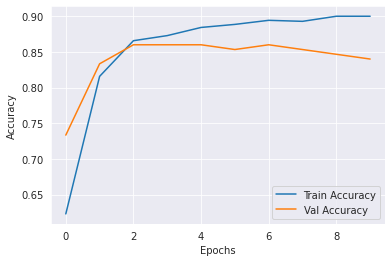

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Deep CNN Architectures

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model with pre-trained weights from ImageNet, excluding the top (last) layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output  # Get the output of the base model
x = Flatten()(x)  # Flatten the output to a 1D feature vector
x = Dense(256, activation='relu')(x)  # Add a dense layer with 256 units and ReLU activation
predictions = Dense(10, activation='softmax')(x)  # Add the final output layer with 10 units for 10 classes, using softmax

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and categorical crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the training data with augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
train_generator = train_datagen.flow_from_directory(
    'path_to_train_data',  # Path to the training data directory
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,  # Set batch size to 32
    class_mode='categorical'  # Use categorical mode for multi-class classification
)

# Train the model on the training data
model.fit(train_generator, epochs=10)  # Train for 10 epochs

# Prepare the test data with normalization
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
test_generator = test_datagen.flow_from_directory(
    'path_to_test_data',  # Path to the test data directory
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,  # Set batch size to 32
    class_mode='categorical'  # Use categorical mode for multi-class classification
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)  # Evaluate and get loss and accuracy
print(f'Test accuracy: {accuracy:.2f}')  # Print the test accuracy


### Explanation of the Code:
- **Imports**: The code imports TensorFlow and necessary Keras modules for loading a pre-trained model, building layers, and processing images.
- **VGG16 Model**: The VGG16 model is loaded with weights pre-trained on ImageNet, but without the final classification layers, allowing customization for a specific task.
- **Custom Layers**: After the VGG16 model, custom dense layers are added to adapt the model to the new classification problem (10 classes in this case).
- **Model Freezing**: The layers of the base VGG16 model are frozen to prevent them from being updated during training, leveraging the already learned features.
- **Data Preparation**: `ImageDataGenerator` is used to load and preprocess the training and test images by resizing them and normalizing pixel values.
- **Training and Evaluation**: The model is trained on the training data and evaluated on the test data, with the final accuracy printed out.

# Difference betweeen CNN and RNN

Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) are both types of artificial neural networks used in deep learning, but they are designed for different types of tasks and handle data differently.

### Convolutional Neural Networks (CNNs):
- **Architecture:** CNNs are designed with layers that include convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply filters to the input data to extract spatial features, which are especially useful for processing grid-like data structures such as images.
- **Data Handling:** CNNs excel at capturing spatial hierarchies and local patterns in data, like edges, textures, and shapes in images. They work well with 2D data like images or 3D data like videos.
- **Applications:** CNNs are primarily used for tasks like image classification, object detection, and segmentation, where the spatial structure of the data is crucial.

### Recurrent Neural Networks (RNNs):
- **Architecture:** RNNs have a looped architecture where the output from a layer is fed back into the input, allowing them to maintain a memory of previous inputs. This structure makes them suitable for sequential data.
- **Data Handling:** RNNs are designed to process sequences of data, making them ideal for tasks where the order of data is important. They handle time-series data, text, and any other type of sequential data by using their internal state (memory) to capture dependencies across time steps.
- **Applications:** RNNs are commonly used in tasks like natural language processing, speech recognition, and time-series forecasting, where understanding the temporal or sequential context is essential.

### Key Differences:
- **Data Type:** CNNs are best for spatial data (e.g., images), while RNNs are suited for sequential data (e.g., text or time series).
- **Memory:** RNNs have a built-in mechanism to maintain a memory of previous inputs, which is absent in CNNs.
- **Architecture:** CNNs use convolutional operations to capture spatial relationships, whereas RNNs use recurrent connections to capture temporal dependencies.

Each network type is optimized for specific kinds of data and tasks, and sometimes they can be combined in hybrid models to leverage the strengths of both architectures.

# Sequence Model Categories

Sequence models are a broad class of models in deep learning designed to handle sequential data, where the order of the data points matters. These models can be categorized based on how they process input and output sequences. The main categories of sequence models are:
### 1. **One-to-One**
   - **Description:** This is the traditional form of neural networks where a single input produces a single output.
    - **Example:** Image classification where an image is input, and a class label is output.
    - **Application:** Standard feedforward neural networks (e.g., fully connected networks) used in tasks like image recognition.

### 2. **One-to-Many**
   - **Description:** A single input produces a sequence of outputs.
    - **Example:** Image captioning, where an image (input) generates a sentence (output sequence).
    - **Application:** Models like RNNs or CNNs used for generating descriptive text from images or audio files.

### 3. **Many-to-One**
   - **Description:** A sequence of inputs produces a single output.
    - **Example:** Sentiment analysis, where a sequence of words (input) leads to a sentiment label (output).
    - **Application:** RNNs, particularly LSTM or GRU, are used to aggregate information over the sequence to make a final prediction.

### 4. **Many-to-Many**
   - **Description:** A sequence of inputs produces a sequence of outputs. There are two subtypes:
    - **A. Synchronous Many-to-Many:** The output sequence is of the same length as the input sequence.
    - **Example:** Video classification on a frame-by-frame basis, where each frame (input) leads to a classification (output).
- **B. Asynchronous Many-to-Many:** The output sequence can be of a different length than the input sequence.
- **Example:** Machine translation, where a sentence in one language (input) is translated into a sentence in another language (output).
- **Application:** RNNs, LSTMs, GRUs, and Transformer models are commonly used, with applications in tasks like language translation, speech recognition, and video captioning.

### 5. **Sequence-to-Sequence (Seq2Seq)**
- **Description:** A specific type of Many-to-Many model where both input and output are sequences, often of different lengths.
- **Example:** Language translation, where the input is a sentence in one language and the output is the corresponding sentence in another language.
- **Application:** Seq2Seq models typically use an encoder-decoder architecture, often with attention mechanisms (as in the Transformer model), and are widely used in tasks like translation, summarization, and conversational AI.

### 6. **Attention and Transformer Models**
- **Description:** These models, particularly the Transformer architecture, use attention mechanisms to process sequences in parallel rather than sequentially. This allows them to handle long-range dependencies and scale well to large datasets.
- **Example:** BERT, GPT, and other Transformer-based models are used for tasks like text generation, language modeling, and machine translation.
- **Application:** Natural language processing tasks, including those that require understanding context over long sequences.

These categories provide a framework for understanding how sequence models can be applied to various tasks depending on the nature of the input and output data.